In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

OSEMN Pipeline¶
O - Obtaining our data
S - Scrubbing / Cleaning our data
E - Exploring / Visualizing our data will allow us to find patterns and trends
M - Modeling our data will give us our predictive power as a wizard
N - INterpreting our data

In [2]:
cd 'diabetes database/'

/home/lgi/Desktop/diabetes database


In [3]:
dataset = pd.read_csv('../diabetes.csv')

In [4]:
dataset.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
dataset.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [7]:
dataset.count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

In [8]:
dataset.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

In [9]:
dataset.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

Replace zeroes value with Nan

In [28]:
#make a copy of dataset

dataset_copy = dataset.copy(deep= True)
#deep=True`` (default), a new object will be created with a copy of the calling object's data and indices.

#fill zero with NaN
dataset_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = dataset_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [29]:
#fill NaN values with mean/median values
dataset_copy['Glucose'].fillna(dataset_copy['Glucose'].mean(), inplace= True)
dataset_copy['BloodPressure'].fillna(dataset_copy['BloodPressure'].mean(), inplace= True)
dataset_copy['SkinThickness'].fillna(dataset_copy['SkinThickness'].median(), inplace= True)
dataset_copy['BloodPressure'].fillna(dataset_copy['BloodPressure'].median(), inplace= True)
dataset_copy['Insulin'].fillna(dataset_copy['Insulin'].median(), inplace = True)
dataset_copy['BMI'].fillna(dataset_copy['BMI'].median(), inplace = True)

In [30]:
dataset_copy.tail()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0    125.0  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0           29.0    125.0  30.1   
767            1     93.0           70.0           31.0    125.0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

In [31]:
dataset.tail()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

In [14]:
dataset.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
dataset_2.isnull()

In [ ]:
dataset_2.head()

In [ ]:
dataset_2.hist(figsize= (10,10))

In [ ]:
dataset_2.shape

## Scatter matrix 

In [33]:
from pandas.plotting import scatter_matrix

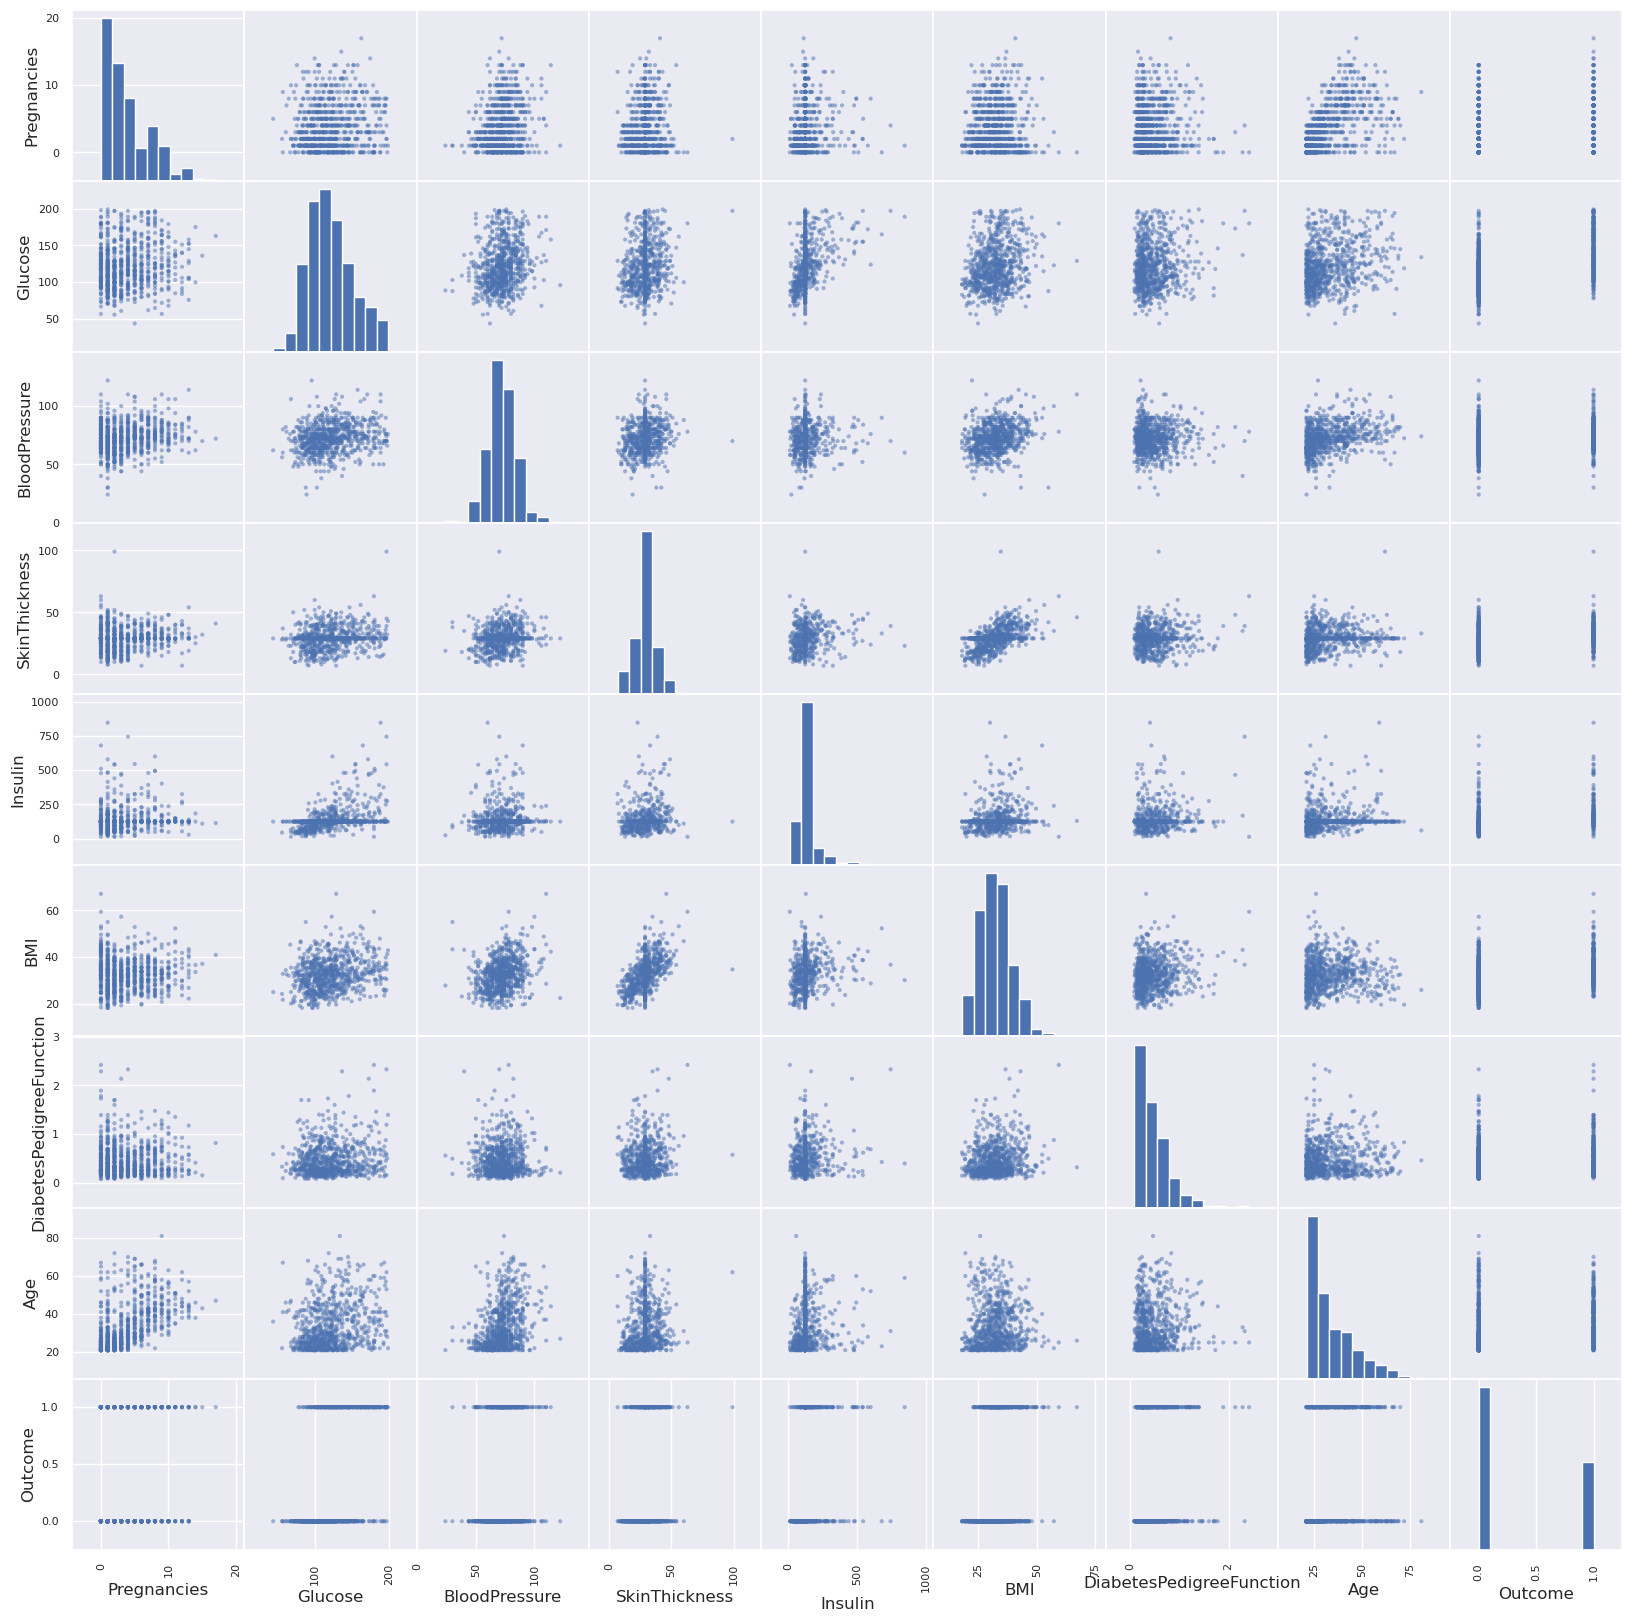

In [34]:
scm = scatter_matrix( dataset_copy,figsize=(20,20), range_padding= 0.5)

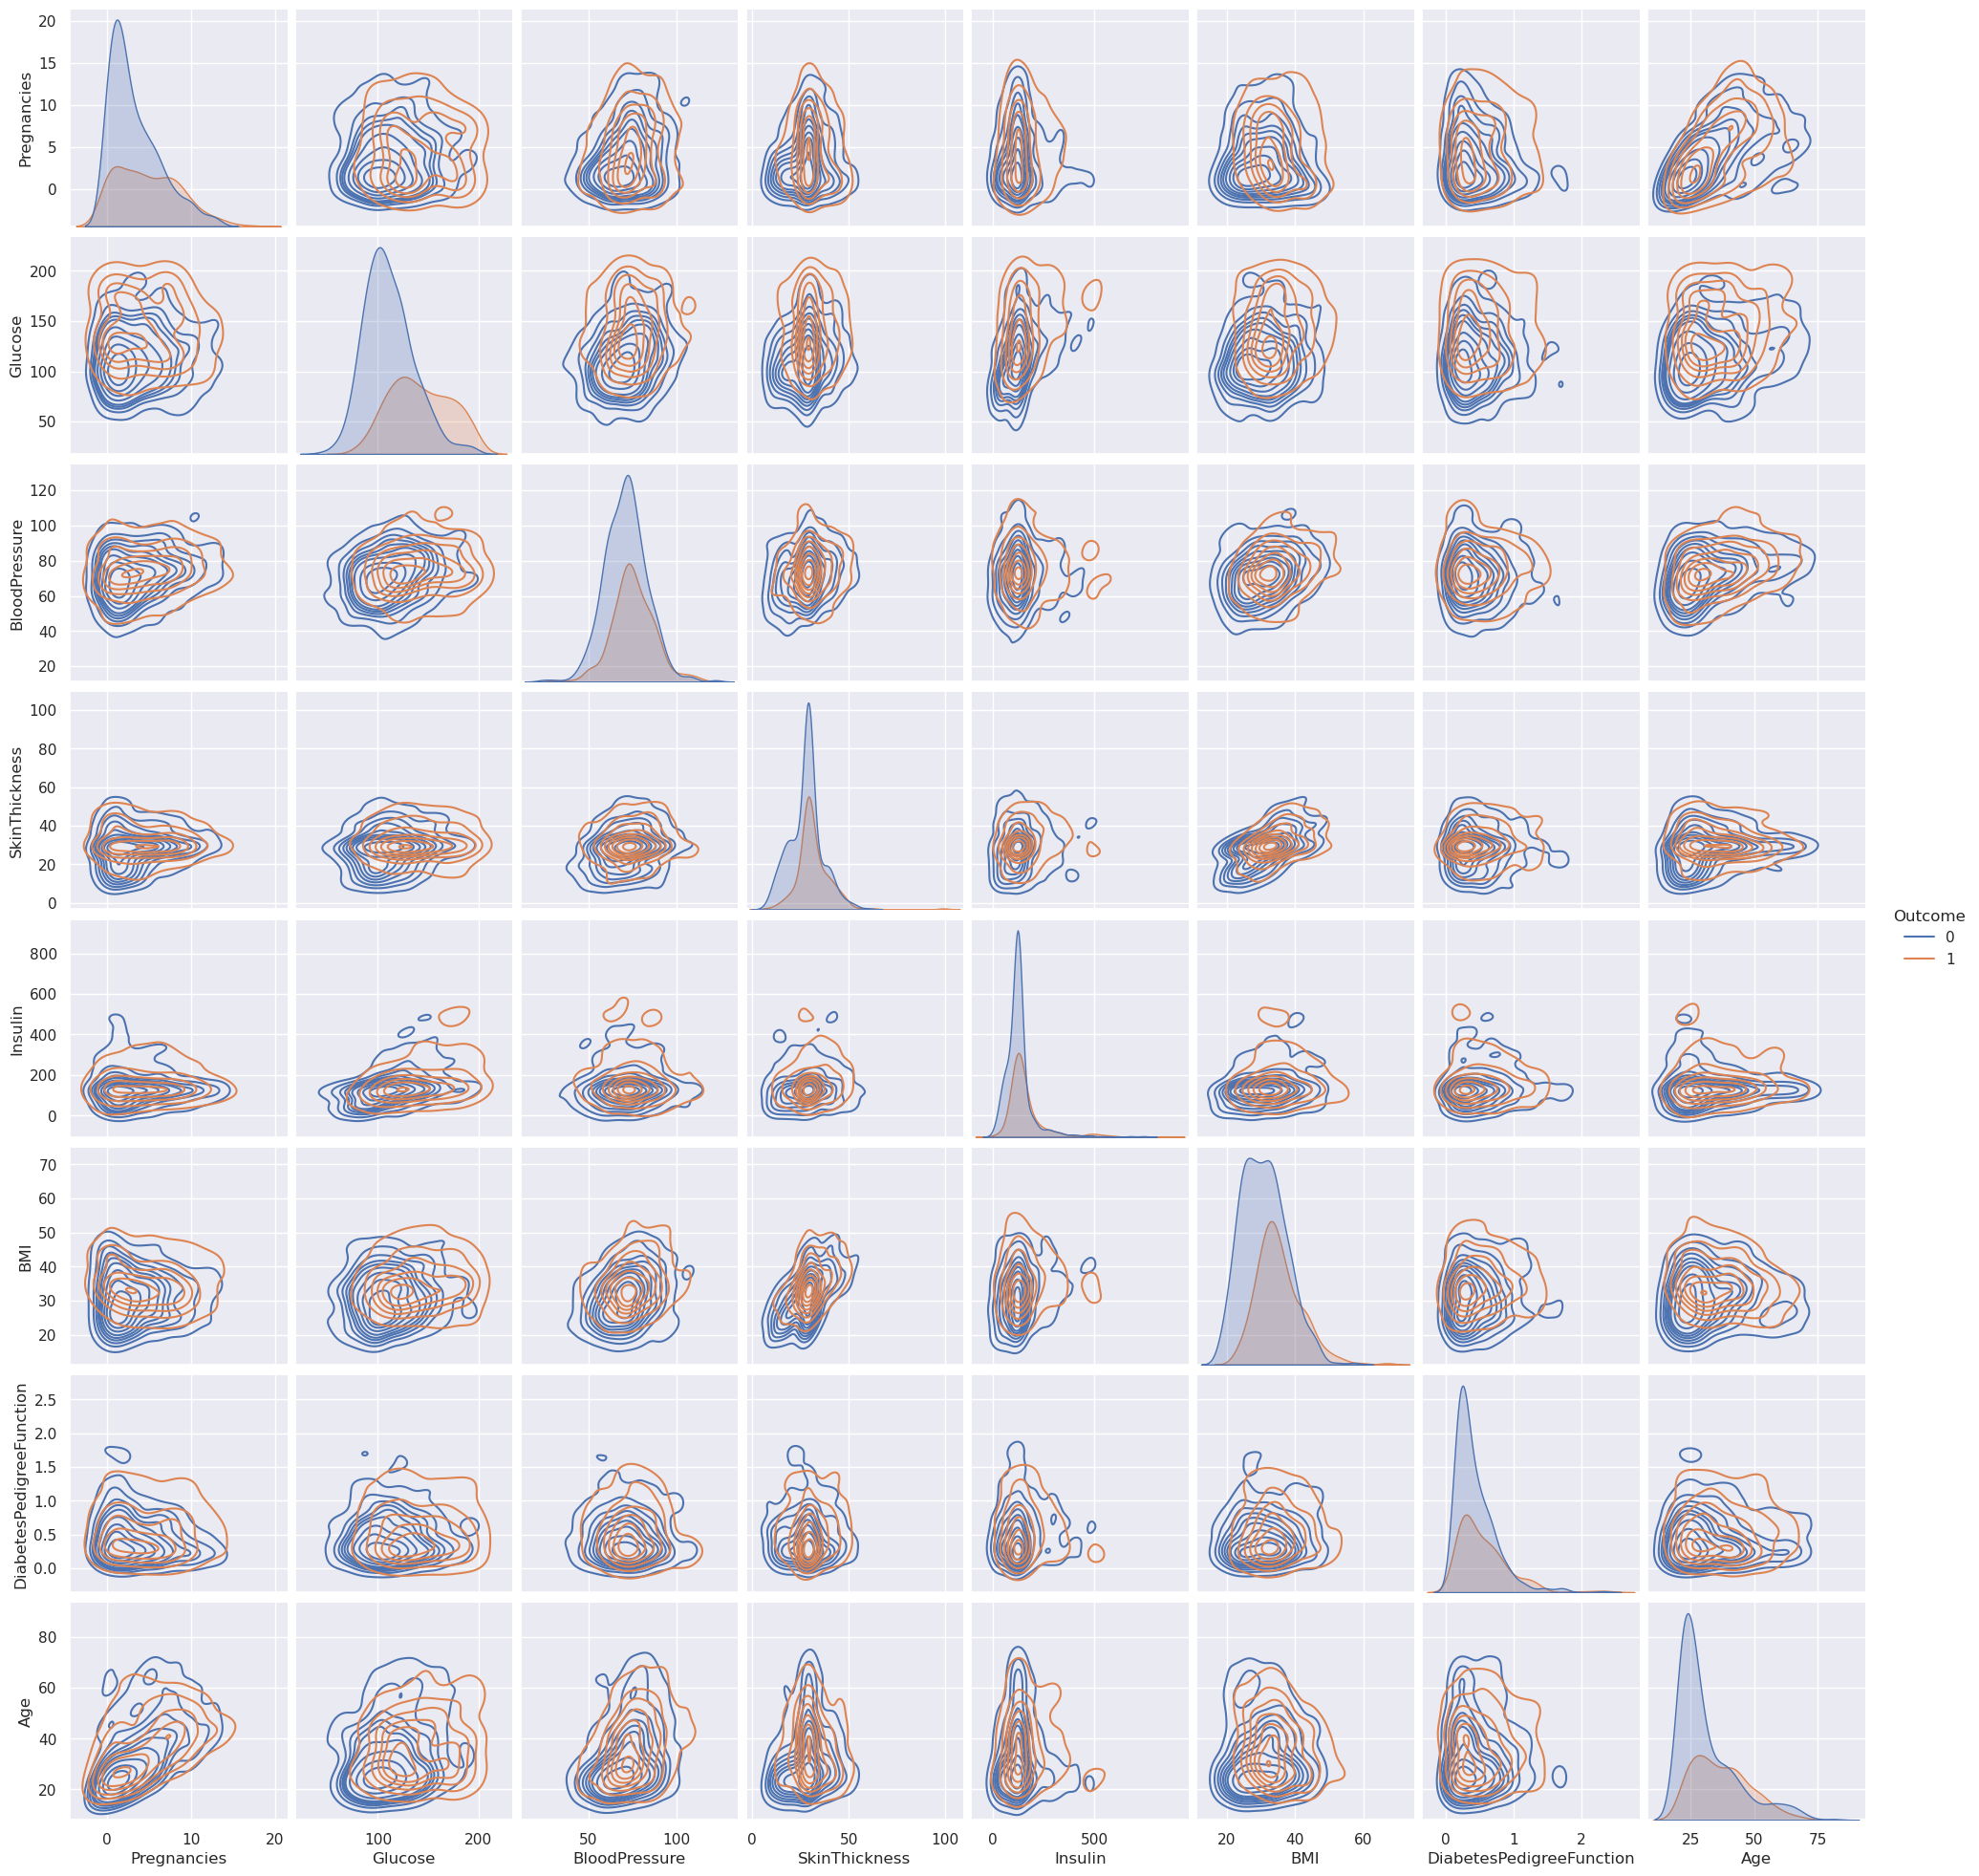

In [35]:
pair_plot = sns.pairplot(dataset_copy, hue = 'Outcome', kind= 'kde')

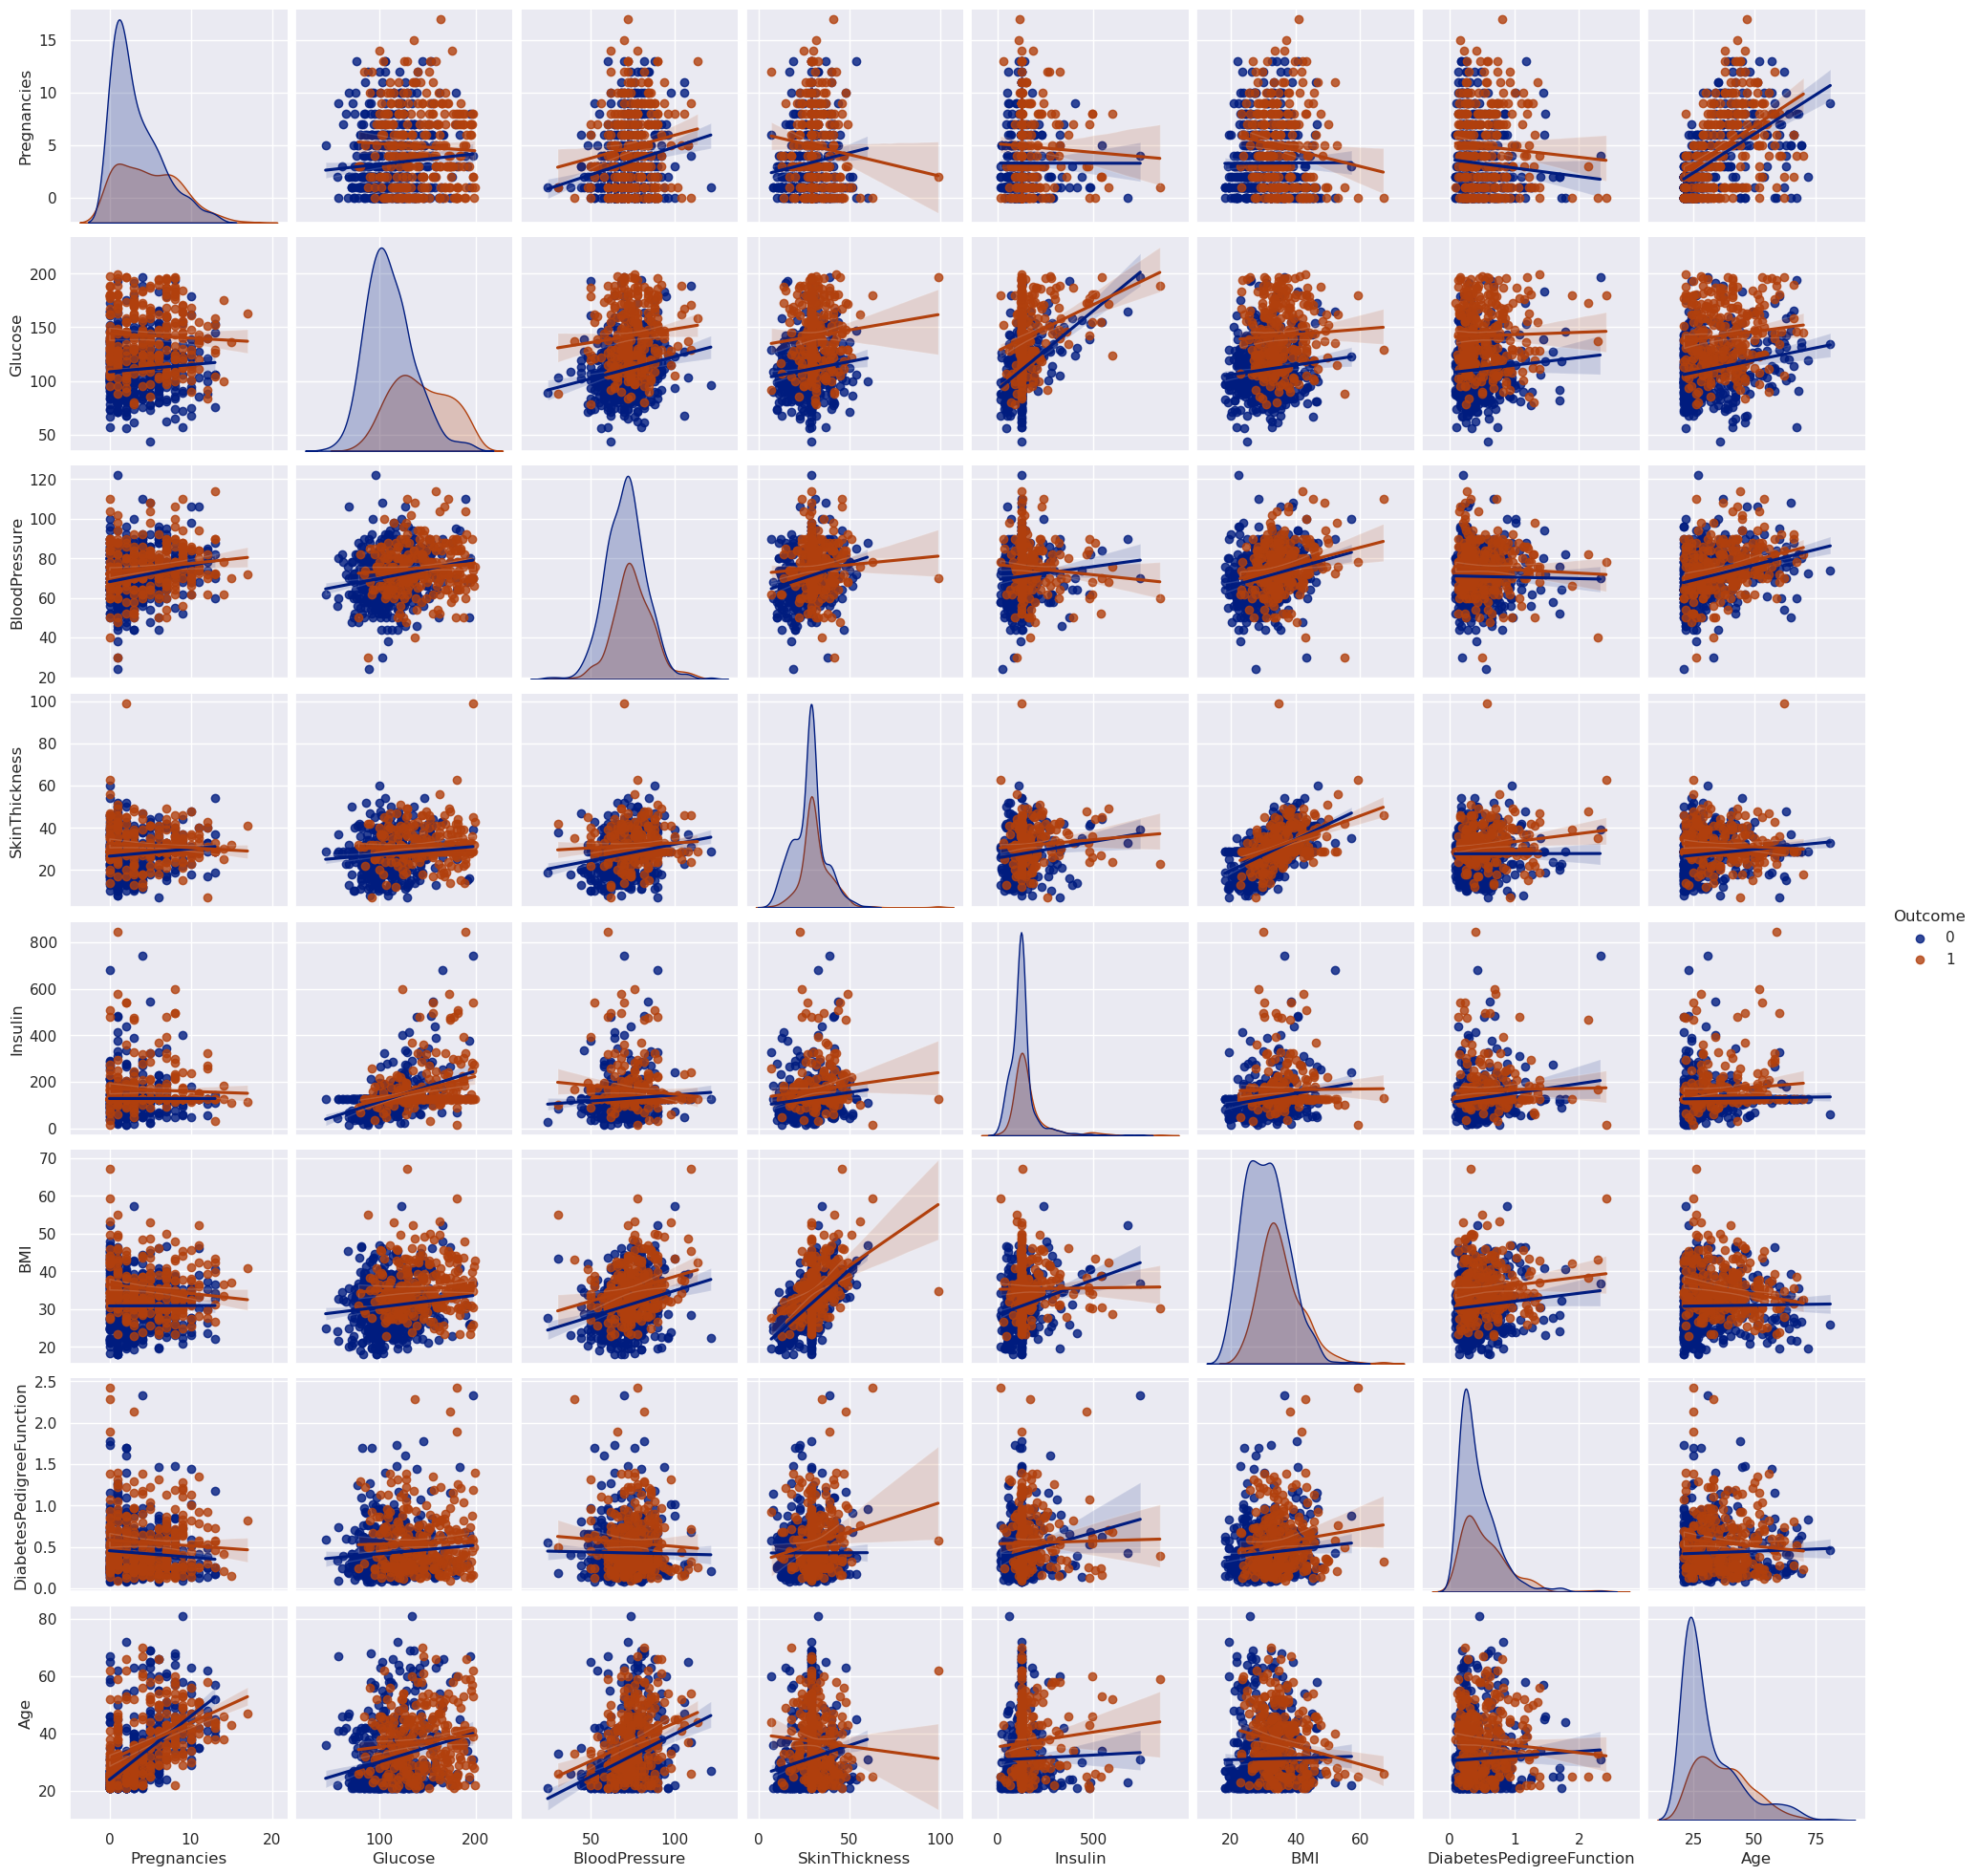

In [36]:
pair_plot = sns.pairplot(dataset_copy, hue = 'Outcome', kind= 'reg', palette='dark')

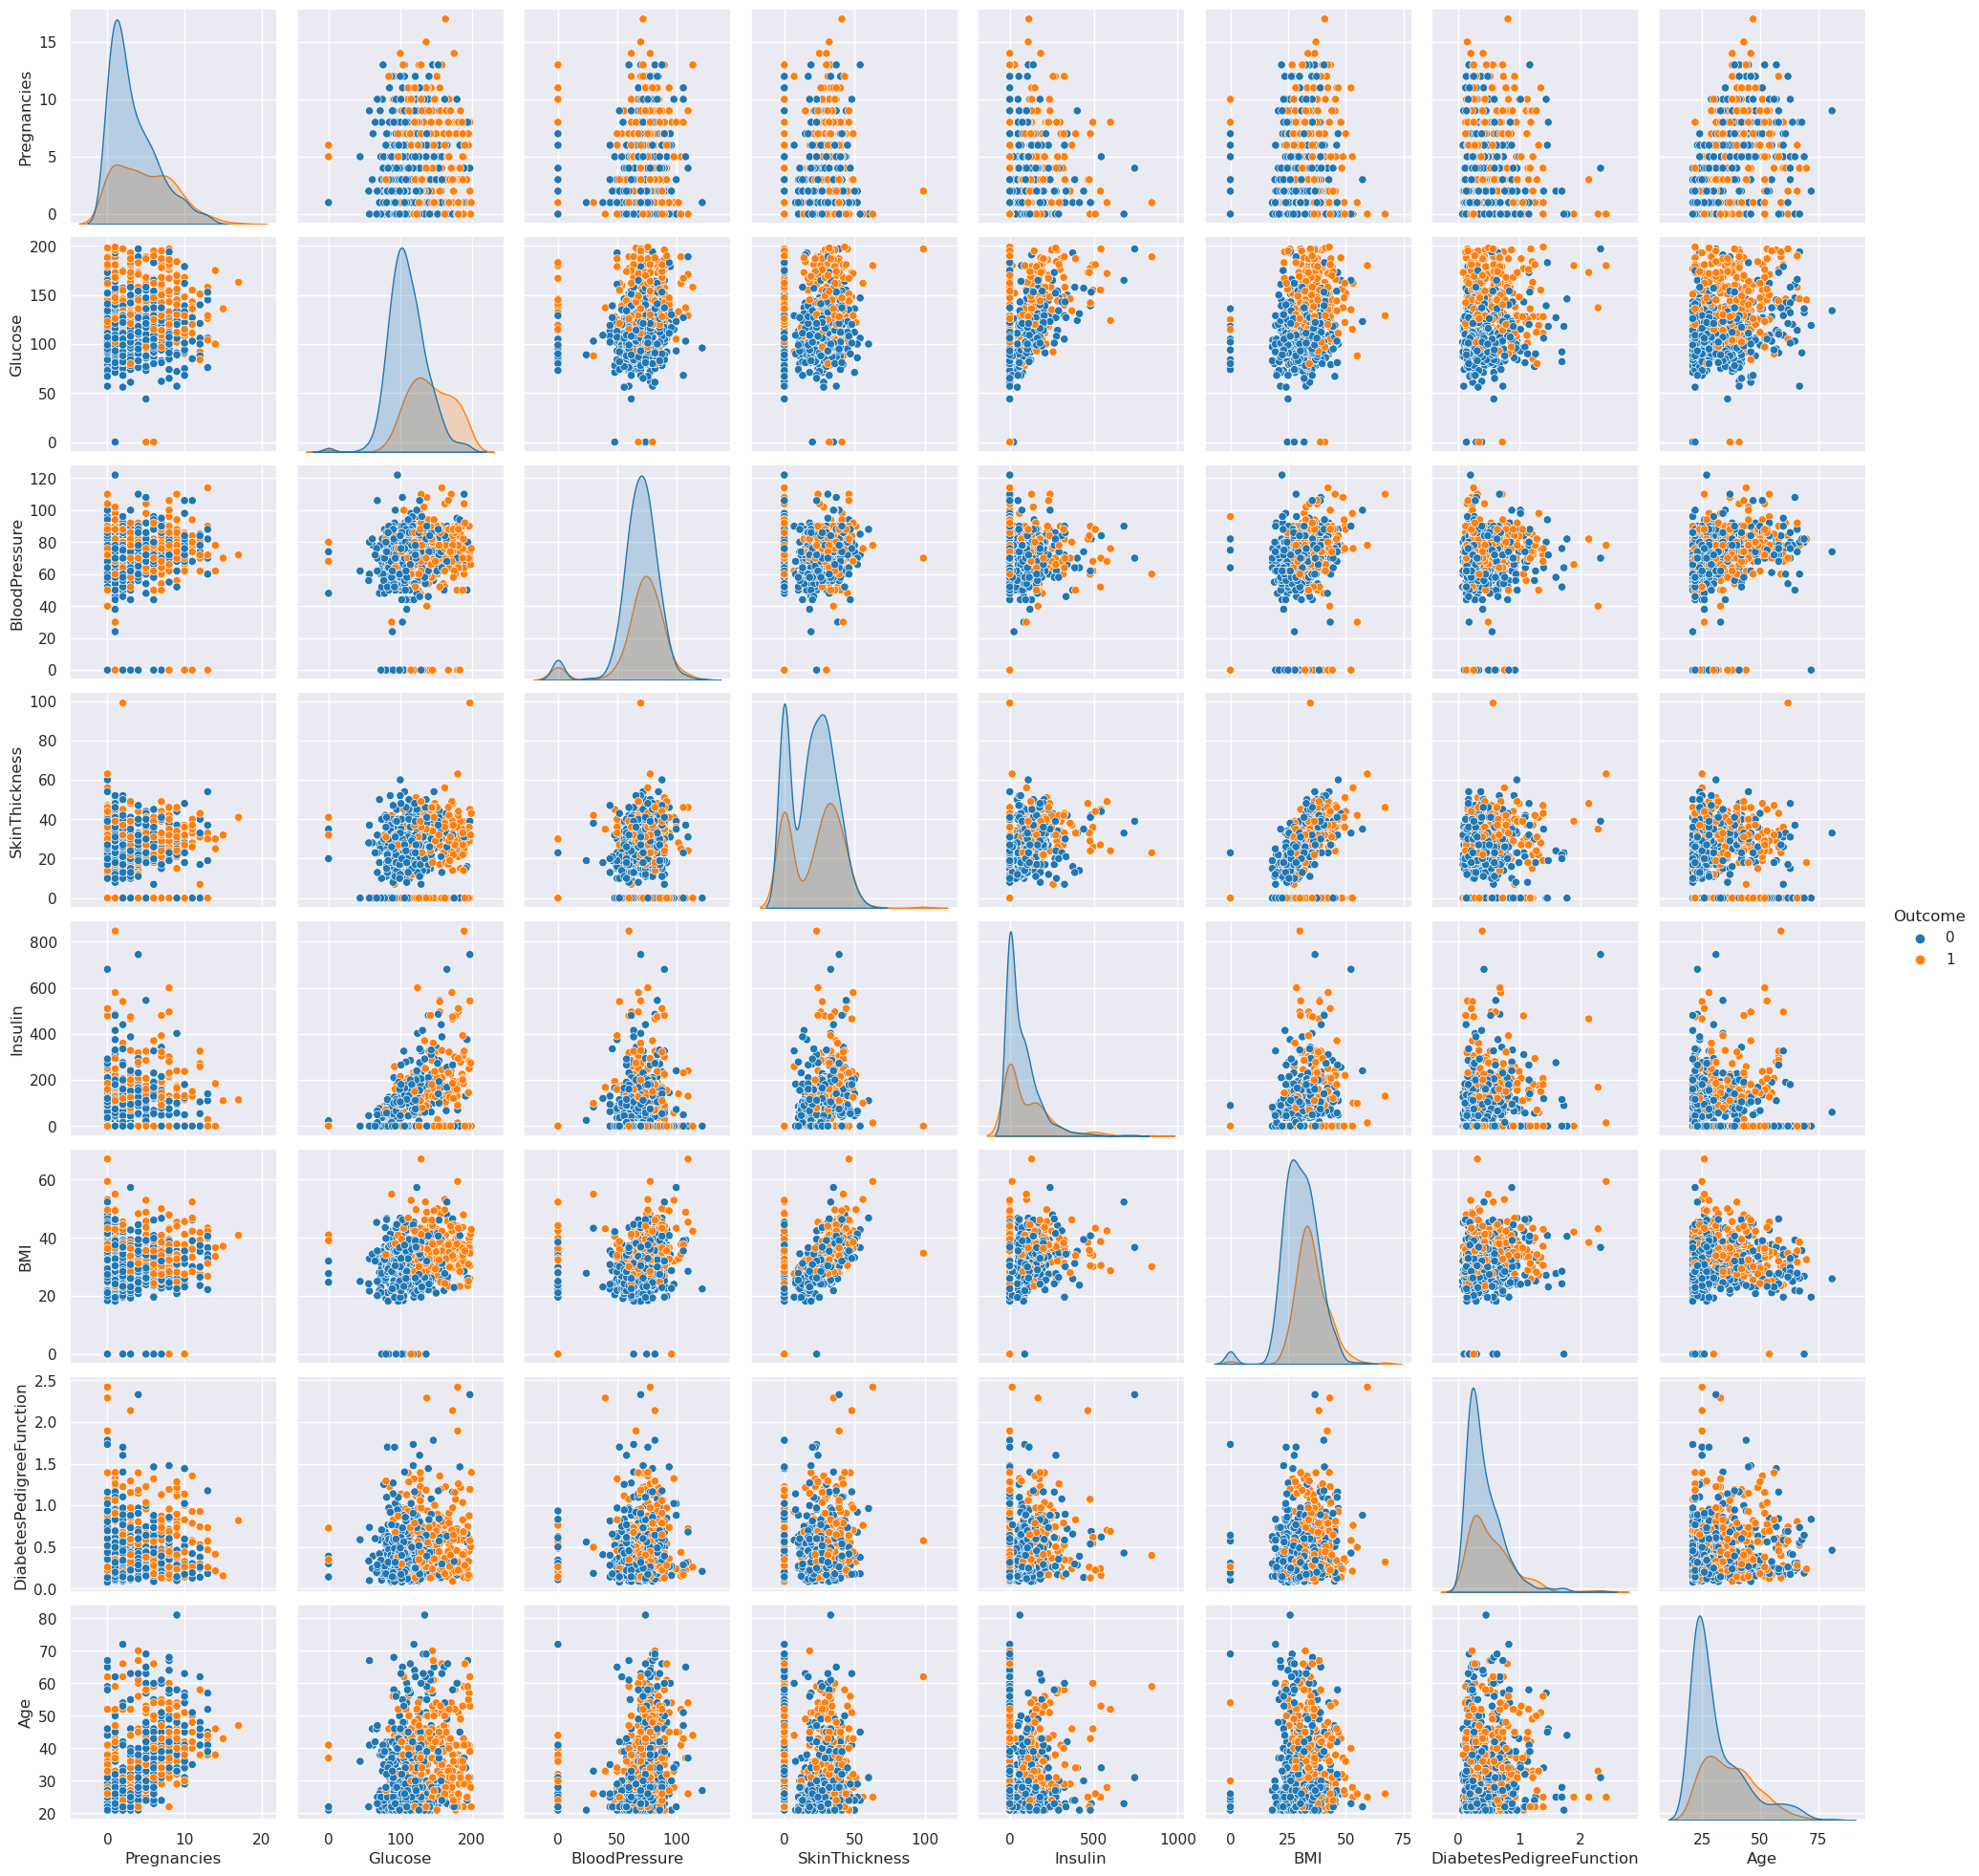

In [37]:
pair_plot = sns.pairplot(dataset, dropna= True, hue = 'Outcome', kind= 'scatter', palette= 'tab10')

### Heatmap for unclean data 

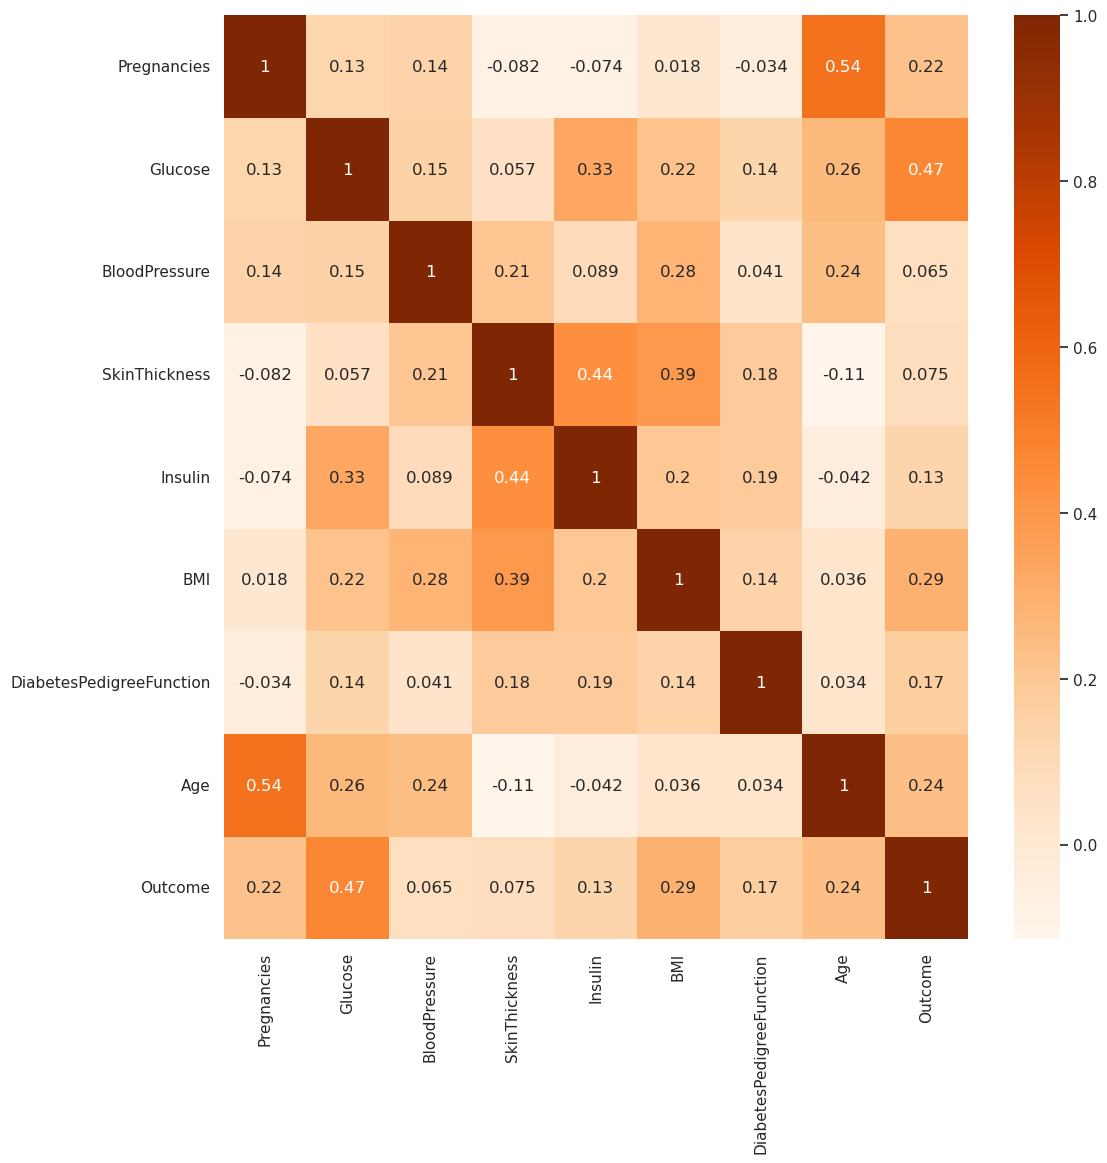

In [38]:
plt.figure(figsize= (12,12))

heatmap_unclean = sns.heatmap(dataset.corr(), annot= True,  cmap='Oranges')

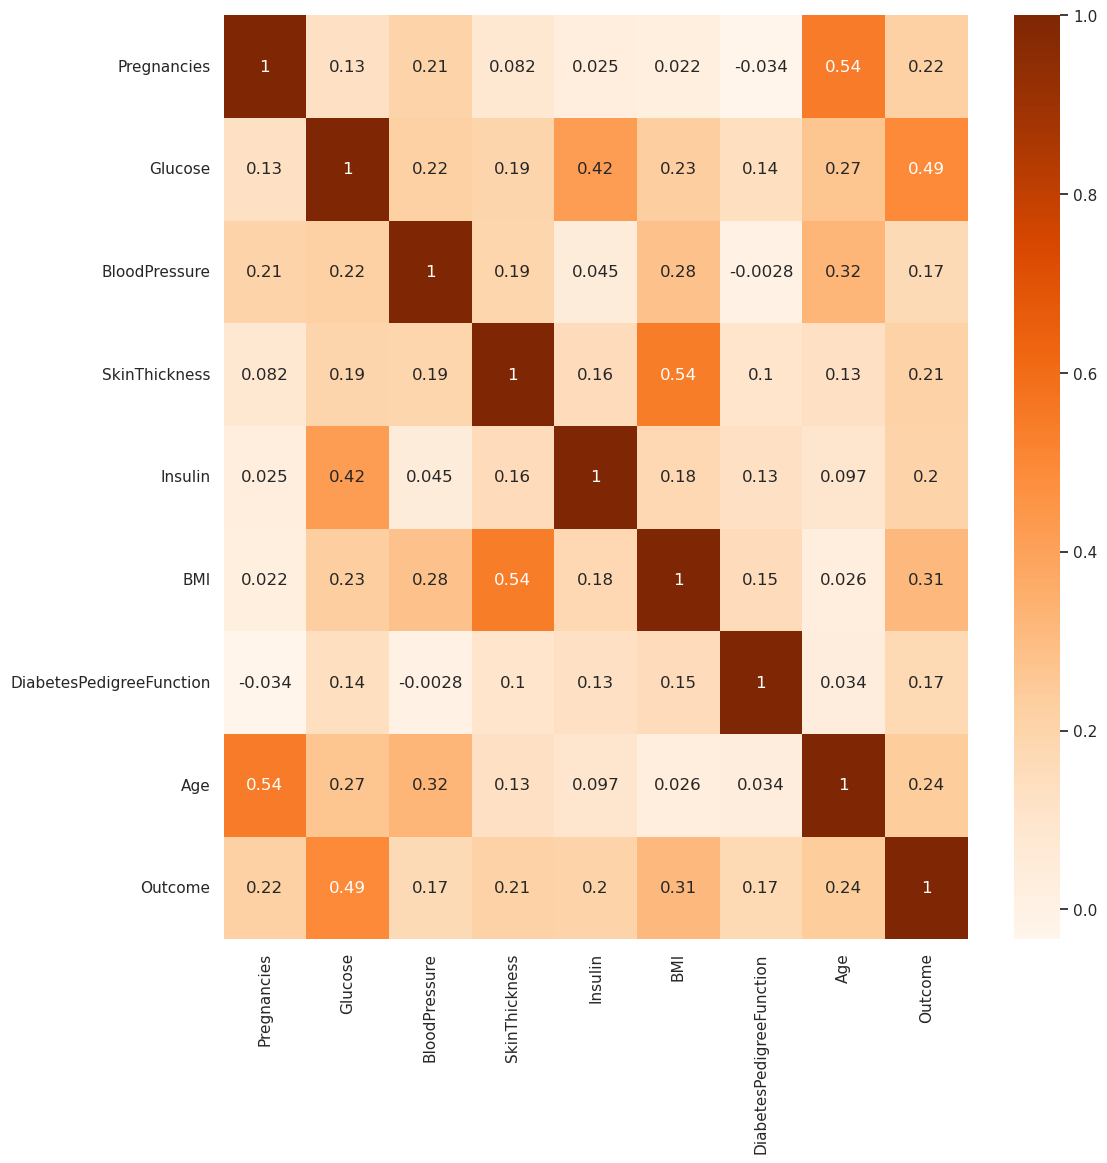

In [39]:
plt.figure(figsize= (12,12))

heatmap_unclean = sns.heatmap(dataset_copy.corr(), annot= True, cmap='Oranges')

## Scaling the data 
data Z is rescaled such that μ = 0 and 𝛔 = 1, and is done through this formula:
![](https://cdn-images-1.medium.com/max/800/0*PXGPVYIxyI_IEHP7.)

In [42]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()

#dropping 'Outcome' column
X = pd.DataFrame(sc_X.fit_transform(dataset_copy.drop(['Outcome'], axis=1),), columns= ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [43]:
X.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.865108      -0.033518       0.670643 -0.181541  0.166619   
1    -0.844885 -1.206162      -0.529859      -0.012301 -0.181541 -0.852200   
2     1.233880  2.015813      -0.695306      -0.012301 -0.181541 -1.332500   
3    -0.844885 -1.074652      -0.529859      -0.695245 -0.540642 -0.633881   
4    -1.141852  0.503458      -2.680669       0.670643  0.316566  1.549303   

   DiabetesPedigreeFunction       Age  
0                  0.468492  1.425995  
1                 -0.365061 -0.190672  
2                  0.604397 -0.105584  
3                 -0.920763 -1.041549  
4                  5.484909 -0.020496

In [44]:
y = dataset_copy.Outcome

### Why Scaling the data for KNN?

#### it is always advisable to bring all the features to the same scale for applying distance based algorithms like KNN.
##### Let's see an example of distance calculation using two features whose magnitudes/ranges vary greatly.
Euclidean Distance = [(100000–80000)^2 + (30–25)^2]^(1/2)

#### We can imagine how the feature with greater range with overshadow or dimenish the smaller feature completely and this will impact the performance of all distance based model as it will give higher weightage to variables which have higher magnitude.

## Test Train Split and Cross Validation methods



***Train Test Split*** : To have unknown datapoints to test the data rather than testing with the same points with which the model was trained. This helps capture the model performance much better.

![](https://cdn-images-1.medium.com/max/1600/1*-8_kogvwmL1H6ooN1A1tsQ.png)

***Cross Validation***: When model is split into training and testing it can be possible that specific type of data point may go entirely into either training or testing portion. This would lead the model to perform poorly. Hence over-fitting and underfitting problems can be well avoided with cross validation techniques

![](https://cdn-images-1.medium.com/max/1600/1*4G__SV580CxFj78o9yUXuQ.png)


***About Stratify*** : Stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

For Reference : https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6


In [45]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [72]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test,y_test))

In [73]:
max_train_Scores = max(train_scores)

#enumerate is useful for obtaining an indexed list: (0, seq[0]), (1, seq[1]), (2, seq[2])
train_score_ind = [i for i,v in enumerate(train_scores) if v == max_train_Scores]

![](https://miro.medium.com/v2/resize:fit:786/format:webp/1*QXqq-wElxkqjBZ_e-HI2kw.png)


In [74]:
#map = Make an iterator that computes the function using arguments from each of the iterables. Stops when the shortest iterable is exhausted.

print('Max train score {} % k = {}'.format(max_train_Scores*100, list(map(lambda x:x+1, train_score_ind))))

Max train score 100.0 % k = [1]


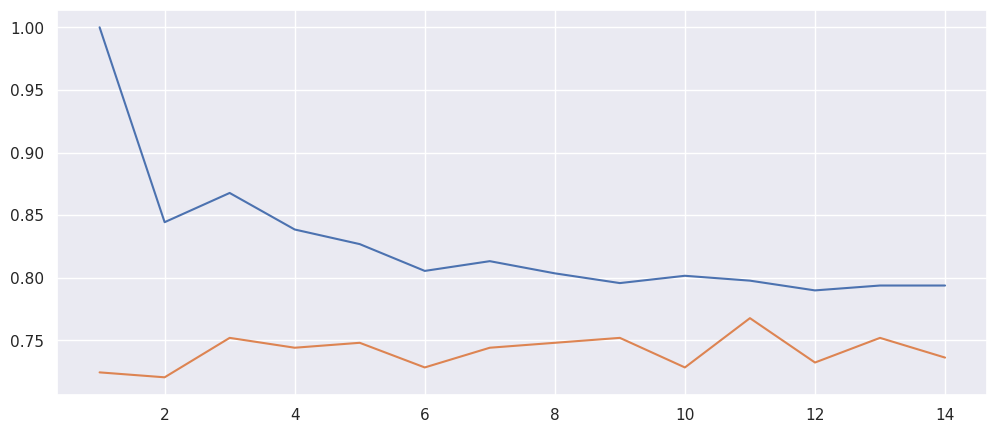

In [75]:
plt.figure(figsize=(12,5))

checkplt = sns.lineplot(x = range(1,15), y = train_scores, markers='*', legend='full')
checkplt = sns.lineplot(x = range(1,15), y = test_scores, markers='o', legend="full")

#### The best result is captured at k = 11 hence 11 is used for the final model

In [76]:
knn = KNeighborsClassifier(11)

In [77]:
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.7677165354330708

In [79]:

value = 20000
width = 20000

from mlxtend.plotting import plot_decision_regions

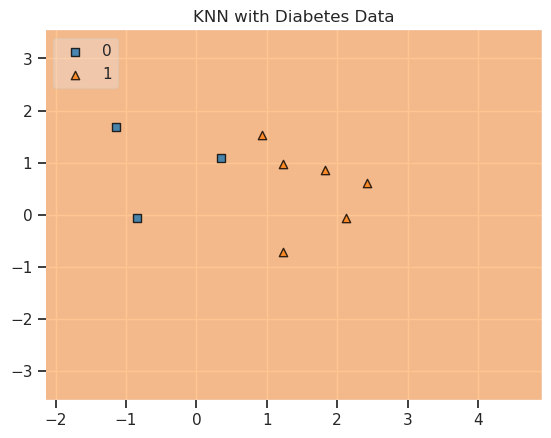

In [81]:
plot_decision_regions(X.values, y.values, clf=knn, legend=2,
                     filler_feature_values={2: value, 3: value, 4: value, 5 : value, 6: value, 7: value}, 
                    filler_feature_ranges={2: width,3: width,4: width,5: width,6: width,7: width})

plt.title('KNN with Diabetes Data')
plt.show()

Text(0.5, 1, 'Confusion matrix')

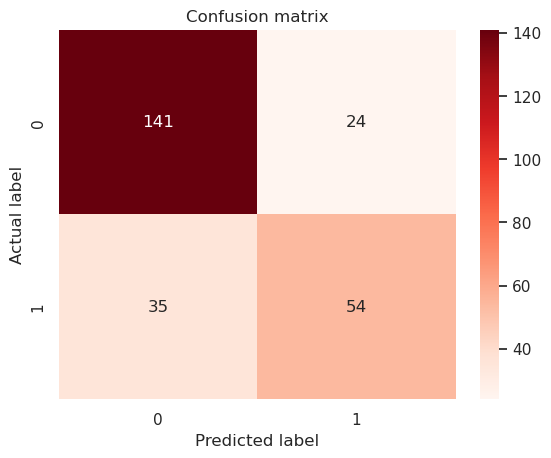

In [90]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

y_pred = knn.predict(X_test)
cnf = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix = sns.heatmap(pd.DataFrame(cnf), annot=True, cmap="Reds", fmt='g')

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix', y =1)

In [92]:
classi_report = print(classification_report(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       165
           1       0.69      0.61      0.65        89

    accuracy                           0.77       254
   macro avg       0.75      0.73      0.74       254
weighted avg       0.76      0.77      0.76       254



## ROC - AUC
ROC (Receiver Operating Characteristic) Curve tells us about how good the model can distinguish between two things (e.g If a patient has a disease or no). Better models can accurately distinguish between the two. Whereas, a poor model will have difficulties in distinguishing between the two

<function matplotlib.pyplot.show(close=None, block=None)>

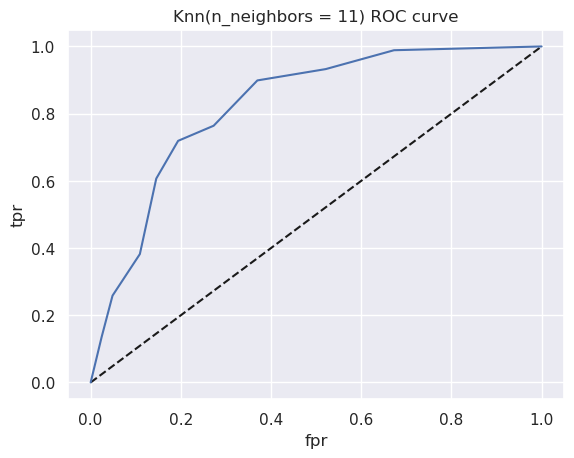

In [94]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label = 'Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors = 11) ROC curve')
plt.show

In [95]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8247191011235955

# Hyper Parameter optimization
Grid search is an approach to hyperparameter tuning that will methodically build and evaluate a model for each combination of algorithm parameters specified in a grid. 

Let’s consider the following example: 

Suppose, a machine learning model X takes hyperparameters a1, a2 and a3. In grid searching, you first define the range of values for each of the hyperparameters a1, a2 and a3. You can think of this as an array of values for each of the hyperparameters. Now the grid search technique will construct many versions of X with all the possible combinations of hyperparameter (a1, a2 and a3) values that you defined in the first place. This range of hyperparameter values is referred to as the grid. 

Suppose, you defined the grid as:
a1 = [0,1,2,3,4,5]
a2 = [10,20,30,40,5,60]
a3 = [105,105,110,115,120,125]

Note that, the array of values of that you are defining for the hyperparameters has to be legitimate in a sense that you cannot supply Floating type values to the array if the hyperparameter only takes Integer values.

Now, grid search will begin its process of constructing several versions of X with the grid that you just defined.

It will start with the combination of [0,10,105], and it will end with [5,60,125]. It will go through all the intermediate combinations between these two which makes grid search computationally very expensive.

In [96]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7721840251252015
Best Parameters: {'n_neighbors': 25}


# Using Gaussian Naive Bayes'

In [101]:
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import f1_score, accuracy_score

classfier = GaussianNB()

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [109]:
classfier.fit(X_train, y_train)

GaussianNB()

In [110]:
y_pred = classfier.predict(X_test)

In [111]:
cm = confusion_matrix(y_test, y_pred)

class_report = print(classification_report(y_test, y_pred))
print(cm)
print(f1_score(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       168
           1       0.61      0.62      0.61        86

    accuracy                           0.74       254
   macro avg       0.71      0.71      0.71       254
weighted avg       0.74      0.74      0.74       254

[[134  34]
 [ 33  53]]
0.6127167630057804
0.7362204724409449
